In [1]:
import numpy as np
import msprime
from IPython.display import SVG, display
import tskit
import matplotlib.pyplot as plt

In [93]:
demography = msprime.Demography()
demography.add_population(name='A', initial_size = 5_000)
demography.add_population(name='B', initial_size = 5_000)
demography.add_population(name='C', initial_size = 5_000)
demography.add_population_parameters_change(time = 3700, initial_size = 0, growth_rate = 0, population = 'B')
demography.add_symmetric_migration_rate_change(time = 3710, populations = ['A', 'B'], rate = 0.5)
demography.add_population_split(time = 37037, derived=['A', 'B'], ancestral = 'C')
demography.sort_events()
demography.debug()
ts = msprime.sim_ancestry(samples = {'A':1}, demography = demography, random_seed = 6)
ts
#SVG(ts.draw_svg()) для показа дерева

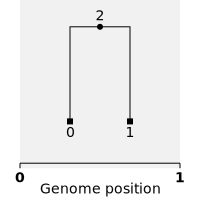

In [94]:
SVG(ts.draw_svg())

In [95]:
def num_of_lines(tree, time):
    if tree.nodes_time[0] > time:
        return np.where(tree.nodes_time == tree.nodes_time[0])[0].shape[0]
    if time < 0:
        return 0
    return np.where(tree.nodes_time[::-1] > time)[0].shape[0] + 1


print(ts.nodes_time[::-1])
print(num_of_lines(ts, 38000))

[3714.7313284    0.           0.       ]
1


In [96]:
vec_num_of_lines = np.vectorize(num_of_lines)

In [97]:
list_of_trees = []
for i in range(1, 501):
    list_of_trees.append(msprime.sim_ancestry(samples = {'A':1}, demography = demography, random_seed = i ** 2))

In [98]:
def lines_in_trees(trees, time_data):
    num_values = []
    number = 0
    for time in time_data:
        for tree_ in trees:
            number += num_of_lines(tree_, time)
        num_values.append(number)
        number = 0
    return num_values

In [102]:
time_values = np.linspace(0,40000,1100, endpoint = True)
values = np.array(lines_in_trees(list_of_trees, time_values), dtype = 'int32')

In [103]:
print(values.reshape((22, 50)))

[[1000 1000  999 ...  925  923  922]
 [ 920  919  918 ...  848  848  846]
 [ 846  845  695 ...  500  500  500]
 ...
 [ 500  500  500 ...  500  500  500]
 [ 500  500  500 ...  500  500  500]
 [ 500  500  500 ...  500  500  500]]


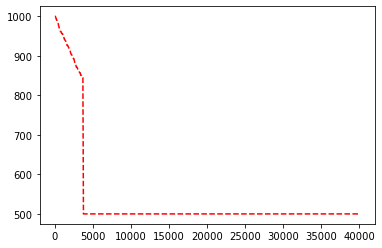

In [104]:
plt.plot(time_values, values, 'r--')

In [105]:
import os
cwd = os.getcwd()
cwd

'C:\\Users\\lyaho'